#  One Dimensional Module with Unique Boundary and Initial Conditions

Here is a resorce we used for insperation
https://nbviewer.org/github/barbagroup/CFDPython/tree/master/lessons/

In [1]:
# Importing the necessary libraries and packages
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation # This imports the animation function we will use to visualize the converging solutions

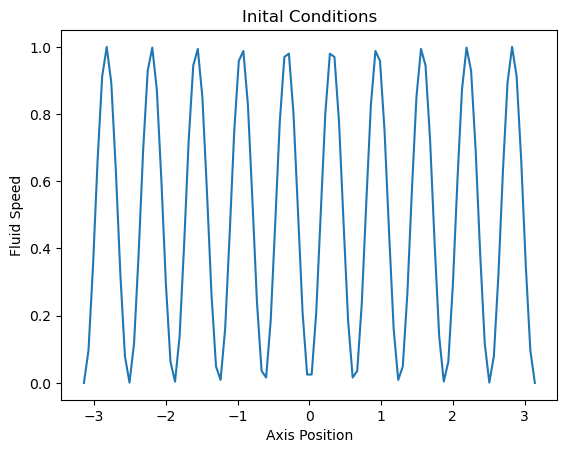

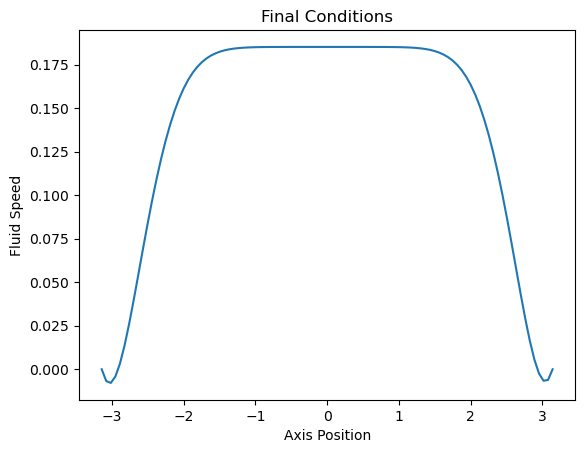

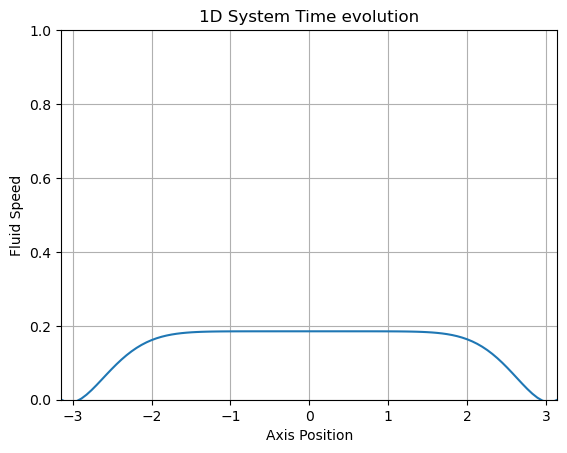

In [67]:
# First, we set number of spatial and time points
nx = 100  # Number of spatial grid points
nt = 100  # Number of time steps

mu = 3     # Viscosity coefficient 
rho = 100  # Fluid density
C = 5      # Constant driving force 

# Define the grid and its spacing
start = -np.pi
stop = np.pi
dx = (stop - start) / (nx - 1)  # Grid spacing in the x-direction
dt = (stop - start) / (nt - 1)  # Time step duration

# Define the spatial points
x_axis = np.linspace(start = start, stop = stop, num = nx)  # This gives us our x axis we will define our data on


# Initialize the initial condition
V0 = np.sin(5 * x_axis)**2  # sine-squared velocity distribution
V0[0] = 0.0  # boundary condition where the velocity at the left edge = 0
V0[-1] = 0.0  # boundary condition where the velocity at the right edge = 0

# Now we create an array to store velocity at each time step
Results_Sheet = np.zeros ([nt,nx], dtype = np.float32) # This will hold our results, the d type lets us hold more data, but we don't really need it
Results_Sheet[0] += V0 # Imports the first row

# Plotting the initial data
plt.title ("Inital Conditions") 
plt.xlabel ("Axis Position")
plt.ylabel ("Fluid Speed")
plt.plot (x_axis,V0)
plt.show ()

def Term_Three (V, dx):
    """
    Calculate v * dv/dx (third term), which takes in an array like V and returns the value given for each v. Second input is dx which is
    the width of the axis increments.
    
    Parameters:
        V (ndarray): Velocity array at a given time step
        dx (float): Spatial grid spacing
    
    Returns:
        array: Change in velocity 
    """
    
    V_shift = np.roll (V,1)
    V = V * (V - V_shift) / dx
    return V 

def term_Two (V,dx):
    """Calculate v * dv/dx (second term), which takes in an array like V and returns the value given for each v. Second input is dx which is
    the width of the axis increments.
    
    Parameters:
        V (array): Velocity array at a given time step
        dx (float): Spatial grid spacing
    
    Returns:
        array: Change in velocity 
    """
    V_shift_left = np.roll (V,-1)
    V_shift_right = np.roll (V,1)
    V = (V_shift_left + V_shift_right - 2* V) / (dx**2)
    return V

# Time stepping loop
for t in range (nt - 1):
    V = ((dt/rho) * (-C + mu * term_Two(Results_Sheet[t], dx) - Term_Three (Results_Sheet[t], dx))) + Results_Sheet[t]
    V[0] = 0.0 # Reapplying the boundary conditions
    V[-1] = 0.0
    Results_Sheet [t+1] = V
    #plt.plot (axis_lengh, V) #looks cool but meh
    
# Plotting the final data
plt.title ("Final Conditions") 
plt.xlabel ("Axis Position")
plt.ylabel ("Fluid Speed")
plt.plot (x_axis,Results_Sheet[nt - 1])
plt.show ()

# Next, we create the gif animation

fig = plt.figure () # Set a figure, dpi is pixel count
Empty, = plt.plot ([], []) # We create an empty plot as we will add the data to them as we go
writer = PillowWriter (fps = 5) # This starts the writer running at fps = 5 (for quicker load times)

# Setting up the plots
plt.xlim (start, stop) # Set the limits here as we won't instantly have the data to do it automatically
plt.ylim (0,1)
plt.title ("1D System Time evolution") # Plots our Final data
plt.xlabel ("Axis Position")
plt.ylabel ("Fluid Speed")
plt.grid ()

# These are empty lists we will save the data to as we graph
y_data = []

# Save the animation
with writer.saving (fig, outfile = "./1D_Sim.gif", dpi = 100): # This starts the actual graphing prosses, outfile is the save name
    for t in range (nt): # loops through the data we saved
        y_data.append (Results_Sheet[t])
        Empty.set_data (x_axis,y_data) # graphs the data as we loop through it
        writer.grab_frame () # Prints the data
        y_data = [] # Resets the data to being an empty list 

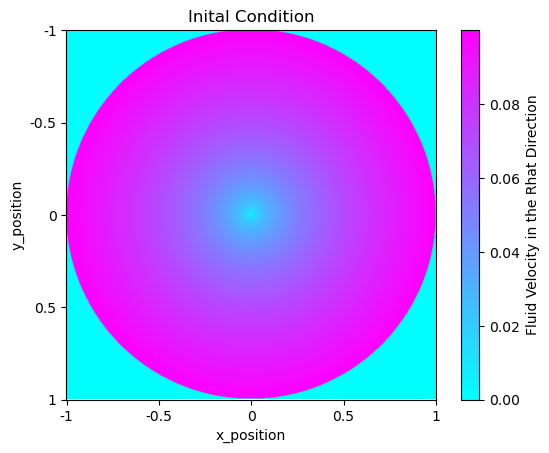

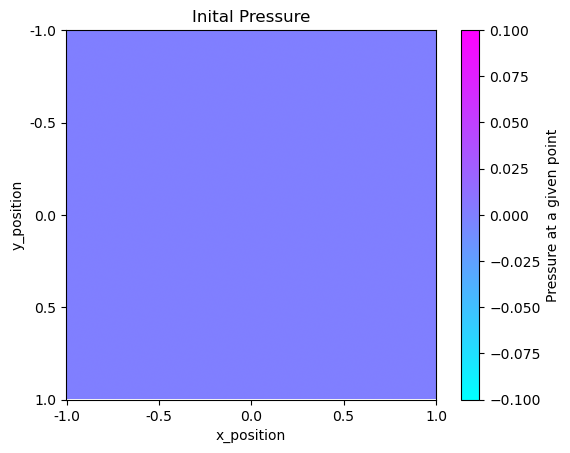

MovieWriter Pillow unavailable; using Pillow instead.


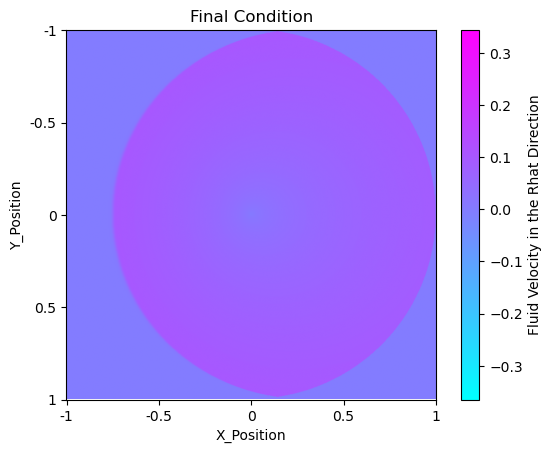

In [2]:
ro = 0.000001 #dencity of air
gamma = 0.0000001 #this is a constatn we need later
#Since our molocules are far too big (because our computer does not have enophe ram to take nr --> infinity) we have to
#fiddle with the constants in order to get a semi realistic simulation to run

nr = 700 #defines 100 unit long axis we will look at
nt = 100 #we split our time axis into nt parts
Radius = 1.0
y_axis = np.linspace (-Radius,Radius, num = nr) #defines our x and y axis
x_axis = np.linspace (-Radius,Radius, num = nr)
dr = 1.0 / (nr - 1.0) #finds our delta x for our gives inpiuts
dt = 0.145 / (nt - 1.0) #ten second sim with nt points

#https://www.engineeringtoolbox.com/water-density-specific-weight-d_595.html #goog to find water dencity

X,Y = np.meshgrid (x_axis,y_axis)

R = np.sqrt (X**2.0 + Y**2.0)
Theta = np.arctan2 (Y,X)

Radius_Filter = R> Radius #selects the values where R>1

V0 = np.sqrt (R) * 0.1 #we have the inital condition that sp
V0[Radius_Filter] = 0 

T0 = np.zeros(np.shape(R), dtype = np.float64) #sets the inital fluid speed in the theta direction

P0 = np.zeros(np.shape(R), dtype = np.float64) #sets inital pressure to be zero everywhere

plt.imshow (V0,cmap = "cool")
plt.colorbar (label = "Fluid Velocity in the Rhat Direction")
plt.title ("Inital Condition")
plt.xticks (np.linspace (0,nr, num = 5),[-1,-0.5,0,0.5,1]) #a nice way to get the ticks to work
plt.yticks (np.linspace (0,nr, num = 5),[-1,-0.5,0,0.5,1])
plt.xlabel ("x_position")
plt.ylabel ("y_position")
plt.show ()

plt.imshow (P0,cmap = "cool")
plt.colorbar (label = "Pressure at a given point")
plt.title ("Inital Pressure")
plt.xticks (np.linspace (0,nr, num = 5),[-1.,-0.5,0.,0.5,1.])
plt.yticks (np.linspace (0,nr, num = 5),[-1.,-0.5,0.,0.5,1.])
plt.xlabel ("x_position")
plt.ylabel ("y_position")
plt.show ()

#Now that we have our inital conditions, we can start with propagations
#we will first define the derrivative functions we will use throughout

def First_Order_Foward_Derrivative (V, dx):
    """Takes in an array and the sepration of each element, then calculates the foward derrivative with the defintion
    V = V+1 - V / dx
    input: array like, float
    returns: array like"""
    V_shift = np.roll (V,-1)
    V = (V_shift - V) / dx
    return V #cheaked and works at least two sig figs

def First_Order_Backwards_Derrivative (V, dx):
    """Takes in an array and the sepration of each element, then calculates the backwards derrivative with the defintion
    V = V - V-1 / dx
    input: array like, float
    returns: array like"""
    V_shift = np.roll (V,1)
    V = (V - V_shift) / dx
    return V #cheaked and works at least two sig figs


def Second_Order_Derrivative (V,dx):
    """Takes in an array and the sepration of each element, then calculates the second order  derrivative with the defintion
    V = V+1 + V-1 - 2V / dx**2
    input: array like, float
    returns: array like"""
    V_shift_left = np.roll (V,-1)
    V_shift_right = np.roll (V,1)
    V = (V_shift_left + V_shift_right - 2* V) / (dx**2)
    return V

def R_Time_Contiunity (R,P,r,t_Results,dr,dt, ro, gamma):
    """
    This function finds the time evolution of the array R (first input), radial position r, T for fluid flow in the theta direction
    and P for pressure for constant inputs dr,dt  ,ro and gamma by the equation
    Rni+1 = t (-1Pni-Pn-1ir +r(rRi + 1 + Ri - 1 - 2Ri Δr2+Rni-Rn-1ir) -r2 + 2r -rRni-Rn-1ir) +Rni  in the Radius axis
    
    Inputs: 
    R: array 
    P: array  
    r: array
    t_results: array
    dr: float
    dt: float
    ro: float
    gamma: float
    
    Returns: 
    array 
    """
    Answer = dt * (-1/ro) * First_Order_Backwards_Derrivative(P,dr)
    Answer = dt * (gamma / r) * (r * Second_Order_Derrivative(R,dr) +  First_Order_Backwards_Derrivative(R,dr))
    Answer -= dt * gamma * t_Results / (r**2)
    Answer += dt * (t_Results**2) / r
    Answer -= dt * r * First_Order_Backwards_Derrivative (R,dr)
    Answer += R
    return Answer
              
def Theta_Time_Contiunity (T,R_Results, r,dr,dt,gamma):
    """
    This function finds the time evolution of the array T (first input), R for radial fluid flow rate and r for radial position
    for constant inputs dr,dt  ,ro and gamma 
    by the equation Θni+1 = t (r(rΘi + 1 + Θi - 1 - 2Θi Δr2+Θni-Θn-1ir) -r2 + Rr-rΘni-Θn-1ir) +Θni  in the theta axis
    
    Inputs: 
    T: array  
    R: array 
    r: array
    dr: float
    dt: float 
    ro: float 
    gamma: float
    
    Returns: 
    array
    """
    Answer = dt * gamma * Second_Order_Derrivative(T,dr)
    Answer += dt * (gamma / r) * First_Order_Backwards_Derrivative(T,dr)
    Answer -= dt * r * First_Order_Backwards_Derrivative (T,dr)
    Answer -= dt * gamma * T / (r**2)
    Answer += T * R_Results / r
    Answer += T                              
    return Answer
              
def Pressure_Time_Evloution (R,T,P,r,t,dr,b):
    """
    This calculates the pressure for a stable condition, we will use the equation 
    Pi=  1(rr - 2)(r2br((Rni-Rn-1ircos()) 2 + 2(Rni-Rn-1irsin())(Θni-Θn-1ircos()) +(Θni-Θn-1irsin())2 - Pi+1- Pi-1-rrPi-1)
    with R, P is pressure and T as our first two input being the fluid flow in the radius and theta axis each and r and t is the position
    of a given coordinate, dr is the space between the r coordinates
    
    Inputs: 
    R: array 
    T: array 
    P:array
    r: array 
    t: array 
    dr: float
    
    Returns:
    array 
    """
    P_Up = np.roll (P,-1)
    P_Down = np.roll (P,1)
    Answer = (1 / ((dr / r) - 2)) * r * b *(First_Order_Backwards_Derrivative(R,dr) * np.cos(t) **2)
    Answer += (1 / ((dr / r) - 2)) * r * b * 2 * (First_Order_Backwards_Derrivative(R,dr)*np.sin(t) * First_Order_Backwards_Derrivative(T,dr)*np.cos(t))
    Answer +=  (1 / ((dr / r) - 2)) * r * b * ((First_Order_Backwards_Derrivative(T,dr) * np.sin(t)) **2)
    Answer += (1 / ((dr / r) - 2)) * (-P_Up - P_Down - ((dr*P_Down)/r))                                        
    return Answer

# Initializing the results sheet for the velocity
Results_Sheet_V = np.zeros ([nt,np.shape (R)[0],np.shape (R)[1]], dtype = np.float64) #this will hold our results
Results_Sheet_V[0] += V0 #improts the first row

# Initializing the results sheet for the theta velocity
Results_Sheet_T = np.zeros ([nt,np.shape (R)[0],np.shape (R)[1]], dtype = np.float64) #this will hold our results
Results_Sheet_T[0] += T0 #improts the first row

# Initializing the results sheet for the pressure
Results_Sheet_P = np.zeros ([nt,np.shape (R)[0],np.shape (R)[1]], dtype = np.float64) #this will hold our results
Results_Sheet_P[0] += P0 #improts the first row


for t in range (nt - 1):
    #Runs the calculuation for pressure
    P_result = Pressure_Time_Evloution (Results_Sheet_V[t],Results_Sheet_T[t],Results_Sheet_P[t],R,Theta, dr,ro) #this calculates the pressure for one spot
    P_result[Radius_Filter] = 0  #applies the boundary contition
    Results_Sheet_P[t+1] += P_result #saves our results
    
    #Runs the calculation for fluid flow in the radius direction
    R_Result = R_Time_Contiunity (Results_Sheet_V[t],Results_Sheet_P[t],R,Results_Sheet_T[t], dr,dt, ro, gamma) #calculates the next R value
    R_Result[Radius_Filter] = 0 #applies the boundaies 
    Results_Sheet_V [t+1] += R_Result #saves our results
    
    #Runs the calculation for the dluid flow in the theta direction
    T_Result = Theta_Time_Contiunity (Results_Sheet_T[t],Results_Sheet_V[t],R,dr,dt,gamma)
    T_Result[Radius_Filter] = 0 #applies the boundaies 
    Results_Sheet_T [t+1] += T_Result #saves our results
    
#now we can animate
fig, ax = plt.subplots() #set a figure, dpi is pixcel count
writervideo = matplotlib.animation.PillowWriter (fps = 5) #this starts the writer running at fps = 5 (for quicker load times)
ims = []

ax.set (xlabel = "X_Position",ylabel = "Y_Position")
ax.set (xticks = [-1,-0.5,0,0.5,1], yticks = [-1,-0.5,0,0.5,1])

ims = []
for i in range(nt):
    im = plt.imshow(Results_Sheet_V[i], animated=True,cmap = "cool")
    if i == 0:
        plt.imshow(Results_Sheet_V[i],cmap = "cool")  # show an initial one first
    ims.append([im])
plt.colorbar (label = "Fluid Velocity in the Rhat Direction")
plt.xticks (np.linspace (0,nr, num = 5),[-1,-0.5,0,0.5,1]) #a nice way to get the ticks to work
plt.yticks (np.linspace (0,nr, num = 5),[-1,-0.5,0,0.5,1])
plt.title ("Final Condition")



ani = matplotlib.animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000) #collects our ainimation

ani.save('2_D CFD SIM.gif',writer = 'Pillow', fps = 5)  #saves the grif
plt.show ()

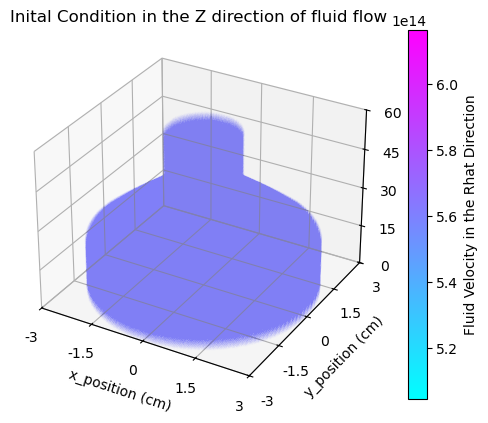

0


In [ ]:
"""Now we can work on the 3D plot. We will simulate the venturi tube in the physics lab. We will use an incompressable fluid 
(we pick water) and chose T = 20 degrees C to select our parameters."""

rho = 99800000000000000000000000000000000000000000000000000000021.0 #kg/m3   
gamma = 0.0000000000000000000000000000000000000000000000000010023 #m2/s  #kenematic viscocity constant
#as before, we have had to manimulate the constants to make it possible for our simulation to run on our hardwhere

z_length = 0.6 #m
Max_Rad = 0.03 #m


# Define spatial grid parameters
nr = 250  # Number of grid points
nt = 2 #number of time steps
nz = 250 #number of grid points in the z axis, I mad it equal to nr as it MASSIVLY makes the calculation easiler


def Radius_Func (z:float, L:float)->float: # Radius of the circular region
    """Finds the radius of our cylinder for a given hight (z). We use a piecewise equation to determine the value of our radius
    and split our tube into thirds with two constant radius ends and one linearly decressing middle. L is the length of our cylinder
    
    Inputs:
    Z: float
    L: float
    
    Returns: float"""
    Max_app = 0.03 #maximum radius of our appature in m
    Min_app = 0.01 #min radius of our appature in m
    m = -(3.0 * (Max_app - Min_app)) / L #slope of our middle section
    b = Max_app - m * L / 3
    if z <= L/ 3:
        return Max_app
    if z > L/3. and z < 2.*L/3.:
        return z * m + b
    if z >= 2. * L / 3.:
        return 0.01 #m
    
# Now we create the axis for x and y and z
y_axis = np.linspace (-Max_Rad,Max_Rad, num = nr, dtype = np.float64) 
x_axis = np.linspace (-Max_Rad,Max_Rad, num = nr, dtype = np.float64)
z_axis = np.linspace (0, z_length, num = nz, dtype = np.float64)

Maximum_Radius = [] #this will hold the maximum value of radius for each hight

for z in z_axis: #finds the maximum allowable radius for each point on our axis
    Maximum_Radius.append (Radius_Func(z,z_length))

# Define grid spacing and time step
dr = 0.001 / (nr - 1.0) 
dt = 0.00000000000000001 / (nt - 1.0)  #we also had to manipulate this (size of atoms)
dz = 0.001 / (nz - 1.0)

dy = dr #also for cart
dx = dr

"""We now need to calculate the value of our forcing term, I will overwrite with an arbirary constant if I can't get it to work
The pasco air supply (model SF9216) we used had a output of 867 pascal and we need to convert that to an expression of accelration
so we multiply by the mass of the air partical it would be pushing agenst to find the accelration of the partical caused 
by that force (Newton's second law). We said the fluid density is constant at rho and the volume of the partical is dr*dr*dz
so m = rho * dr * dr *dz. Hence our expression for our forcing terms is."""
Force = rho * dx**2 * dz * 0.00000000000867#m/s^2 #and we manipulated this after the fact too


# Create a meshgrid for a 2D polar space
X,Y,Z = np.meshgrid(x_axis, y_axis, z_axis)
R = np.sqrt(X**2.0 + Y**2.0)  # Radial distance

Filter = np.zeros (np.shape (R), dtype = bool) #we will use this filter to define the boundaries of our cylinder

for k in range (nz): #for each hight we add to our filter
    Filter[:,:,k] = R[:,:,k] > abs (Maximum_Radius[k]) #if the value of our radius is bigger than the max we drop that value

Inverse_Filter = ((Filter.astype (int) - 1 ) * -1).astype (bool) #this finds the negation of the filter array

# Initialize the velocity and pressure fields
Zv = np.full (np.shape (R),Force * dt, dtype = np.float64) # We have the inital condition that each part is equalized to the air supply
Zv[Filter] = 0  # Outside the circle is 0
Xv = np.zeros(np.shape(R), dtype = np.float64) # Sets the inital fluid speed in the theta direction
Yv = np.zeros(np.shape(R), dtype = np.float64) # Sets the initial pressure to be zero everywhere
P = np.zeros(np.shape(R), dtype = np.float64)

# # Plot initial velocity
fig, ax = plt.subplots (subplot_kw = {"projection" : "3d"}) #sets up our figure
p = ax.scatter (X[Inverse_Filter],Y[Inverse_Filter],Z[Inverse_Filter],c = Zv[Inverse_Filter], cmap = "cool",s = dr) #, alpha = 0.2)
fig.colorbar (p,label = "Fluid Velocity in the Rhat Direction") #sets up our colour bar
ax.set_title ("Inital Condition in the Z direction of fluid flow") #title
ax.set_xlim (-Max_Rad,Max_Rad) #sets our x,y,z lims and titles
ax.set_ylim (-Max_Rad,Max_Rad)
ax.set_zlim (0, z_length)
ax.set_xticks (np.linspace (-Max_Rad,Max_Rad, num = 5),[-3,-1.5,0,1.5,3]) #a nice way to get the ticks to work
ax.set_yticks (np.linspace (-Max_Rad,Max_Rad, num = 5),[-3,-1.5,0,1.5,3])
ax.set_zticks (np.linspace (0,z_length, num = 5),[0,15,30,45,60])
ax.set_xlabel ("x_position (cm)") #lables our x,y,z axis
ax.set_ylabel ("y_position (cm)")
ax.set_zlabel ("z_position (cm)") 
plt.show () #tells Python to display our grap


# We will first define the derivative functions we will use throughout. The derivative functions are below

def FO_Back_Der_Y (U,dx):
    """Calculates the Y derivatve of a scaler field U for step distance dx using the backwards Newton method
    
    Input: 
    U: array like
    dx: float
    
    Returns: Array like"""
    U_Roll = np.roll (U,1,axis = 0)
    U[1:-1,:,:] = (U[1:-1,:,:] - U_Roll[1:-1,:,:]) / dx
    return U

def FO_Back_Der_X (U,dx):
    """Calculates the X derivatve of a scaler field U for step distance dx using the backwards Newton method
    
    Input: 
    U: array like
    dx: float
    
    Returns: Array like"""
    U_Roll = np.roll (U,1,axis = 1)
    U[:,1:-1,:] = (U[:,1:-1,:] - U_Roll[:,1:-1,:]) / dx
    return U

def FO_Back_Der_Z (U,dx):
    """Calculates the Z derivatve of a scaler field U for step distance dx using the backwards Newton method
    
    Input: 
    U: array like
    dx: float
    
    Returns: Array like"""
    U_Roll = np.roll (U,1,axis = 2)
    U[:,:,1:-1] = (U[:,:,1:-1] - U_Roll[:,:,1:-1]) / dx
    return U

def SO_Back_Der_Y (U,dx):
    """Calculates the second Y derivatve of a scaler field U for step distance dx using the backwards Newton method
    
    Input: 
    U: array like
    dx: float
    
    Returns: Array like"""
    U_Roll = np.roll (U,1,axis = 0)
    U_Roll_down = np.roll (U,-1,axis = 0)
    U[1:-1,:,:] = (-2 * U[1:-1,:,:] + U_Roll[1:-1,:,:] + U_Roll_down[1:-1,:,:]) / dx**2
    return U

def SO_Back_Der_X (U,dx):
    """Calculates the second X derivatve of a scaler field U for step distance dx using the backwards Newton method
    
    Input: 
    U: array like
    dx: float
    
    Returns: Array like"""
    U_Roll = np.roll (U,1,axis = 1)
    U_Roll_down = np.roll (U,-1,axis = 1)
    U[:,1:-1,:] = (-2 * U[:,1:-1,:] + U_Roll[:,1:-1,:] + U_Roll_down[:,1:-1,:]) / dx**2
    return U

def SO_Back_Der_Z (U,dx):
    """Calculates the second Z derivatve of a scaler field U for step distance dx using the backwards Newton method
    
    Input: 
    U: array like
    dx: float
    
    Returns: Array like"""
    U_Roll = np.roll (U,1,axis = 2)
    U_Roll_down = np.roll (U,-1,axis = 2)
    U[:,:,1:-1] = (-2 * U[:,:,1:-1] + U_Roll[:,:,1:-1] + U_Roll_down[:,:,1:-1]) / dx**2
    return U

#We will now use these function to calculate the Navier Strokes equation in each axis.

def X_eve (X,Y,Z,P,rho,gamma,dx,dy,dz,dt):
    """This finds the time evelution of a point in the X fluid flow direction. Takes in X, flow rate in the X direction,
    Y, flow rate in the y direction, Z, flow rate in the z direction, rho, density of air, gamma, viscosity of our liquid,
    dx,dy,dz and dt which are the step length in the x,y,z and t axis each.
    
    Input:
    X: Array Like
    Y: Array Like
    Z: Array Like
    P: Array Like
    rho: float
    gamma: float
    dx: float
    dy: float
    dz: float
    dt: float
    
    Return: float
    """
    Answer = -dt/rho * FO_Back_Der_X (P,dx)
    Answer += dt * gamma * (SO_Back_Der_X(X,dx) + SO_Back_Der_Y(X,dy) + SO_Back_Der_Z(X,dz))
    Answer -= dt * (X * FO_Back_Der_X (X,dx) + Y * FO_Back_Der_Y (X,dy) + Z * FO_Back_Der_Z (X,dz))
    Answer -= X
    return Answer

def Y_eve (X,Y,Z,P,rho,gamma,dx,dy,dz,dt):
    """This finds the time evelution of a point in the Y fluid flow direction. Takes in X, flow rate in the X direction,
    Y, flow rate in the y direction, Z, flow rate in the z direction, rho, density of air, gamma, viscosity of our liquid,
    dx,dy,dz and dt which are the step length in the x,y,z and t axis each.
     
    Input:
    X: Array Like
    Y: Array Like
    Z: Array Like
    P: Array Like
    rho: float
    gamma: float
    dx: float
    dy: float
    dz: float
    dt: float
    
    Return: float"""
    
    Answer = -dt/rho * FO_Back_Der_Y (P,dy)
    Answer += dt * gamma * (SO_Back_Der_X(Y,dx) + SO_Back_Der_Y(Y,dy) + SO_Back_Der_Z(Y,dz))
    Answer -= dt * (X * FO_Back_Der_X (Y,dx) + Y * FO_Back_Der_Y (Y,dy) + Z * FO_Back_Der_Z (Y,dz))
    Answer -= Y
    return Answer

def Z_eve (X,Y,Z,P,rho,gamma,dx,dy,dz,dt,F):
    """This finds the time evelution of a point in the Z fluid flow direction. Takes in Z, flow rate in the X direction,
    Y, flow rate in the y direction, Z, flow rate in the z direction, rho, density of air, gamma, viscosity of our liquid,
    dx,dy,dz and dt which are the step length in the x,y,z and t axis each. We also include a forcing term F.
     
    Input:
    X: Array Like
    Y: Array Like
    Z: Array Like
    P: Array Like
    rho: float
    gamma: float
    dx: float
    dy: float
    dz: float
    dt: float
    F:float
    
    Return: float"""
    
    Answer = -dt/rho * FO_Back_Der_Z (P,dz)
    Answer += dt * gamma * (SO_Back_Der_X(Z,dx) + SO_Back_Der_Y(Z,dy) + SO_Back_Der_Z(Z,dz))
    Answer -= dt * (X * FO_Back_Der_X (Z,dx) + Y * FO_Back_Der_Y (Z,dy) + Z * FO_Back_Der_Z (Z,dz))
    Answer -= Z
    Answer += F
    return Answer

def P_Finder (X,Y,Z,P,rho,dx,dy,dz):
    """This function calculates the value of pressure at a given point as a function of the fluid flow rate
    X,Y,Z in those axis and step distances dx,dy,dz for each axis
    
    Input:
    X: Array Like
    Y: Array Like
    Z: Array Like
    P: Array Like
    rho: float
    dx: float
    dy: float
    dz: float
    
    Return: Array Like"""
    P_Up_X = np.roll (P,1,axis = 0)
    P_Up_Y = np.roll (P,1,axis = 1)
    P_Up_Z = np.roll (P,1,axis = 2)
    P_Down_X = np.roll (P,-1,axis = 0)
    P_Down_Y = np.roll (P,-1,axis = 1)
    P_Down_Z = np.roll (P,-1,axis = 2)

    P = (-0.5 * (dx**2 * dy**2 * dz**2) / (dy**2 * dz**2 + dx**2 * dz**2 + dx**2 * dy**2)) * (-rho * ((FO_Back_Der_Z(Y,dz) + FO_Back_Der_Y(Z,dy))**2 + (FO_Back_Der_Z(X,dz) + FO_Back_Der_X(Z,dx))**2 + (FO_Back_Der_Y(X,dy) + FO_Back_Der_X(Y,dx))**2))
    P += (-0.5 / (dy**2 * dz**2 + dx**2 * dz**2 + dx**2 * dy**2)) * ( dy**2 * dz**2 * (P_Up_X + P_Down_X) + dx**2 * dz**2 * (P_Up_Y + P_Down_Y) + dx**2 + dy**2 * (P_Up_Z + P_Down_Z))
    return P


#Now, we want to start finding the time evilution of each of our point

for t in range (nt - 1): #we start to loop through our time trials, we do -1 since we start with some data as inital condtions
    print (t)
    Zv = Z_eve (Xv,Yv,Zv,P,rho,gamma,dx,dy,dz,dt,Force) #preforms the calculations to calculate the next temporal step for each fluid flow
    Xv = X_eve (Xv,Yv,Zv,P,rho,gamma,dx,dy,dz,dt)
    Yv = Y_eve (Xv,Yv,Zv,P,rho,gamma,dx,dy,dz,dt)
    P = P_Finder (Xv,Yv,Zv,P,rho,dx,dy,dz) #calculates the next step for the pressure value

MovieWriter Pillow unavailable; using Pillow instead.


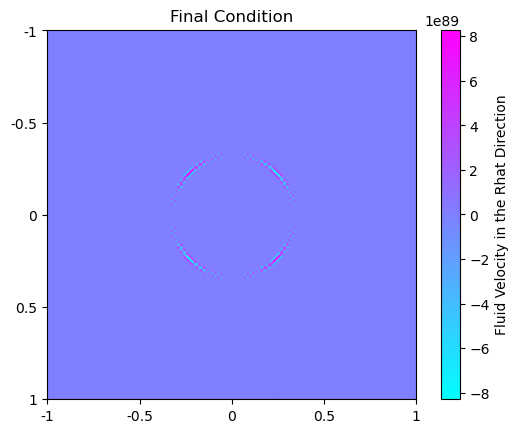

In [66]:
#now we can animate
fig, ax = plt.subplots() #set a figure, dpi is pixcel count
writervideo = matplotlib.animation.PillowWriter (fps = 5) #this starts the writer running at fps = 5 (for quicker load times)
ims = []
Index = [0,1,90,91,100,110,120,130,140,150,160,249] #we print the index that contain usefull information
for i in Index: #loop throighthem
    im = plt.imshow(Zv[:,:,i], animated=True,cmap = "cool") #Prints our inital results
    if i == 0:
        plt.imshow(Zv[:,:,i],cmap = "cool")  # prints all the other results so we can animate
    ims.append([im])
plt.colorbar (label = "Fluid Velocity in the Rhat Direction") #lables all our position
plt.xticks (np.linspace (0,nr, num = 5),[-1,-0.5,0,0.5,1]) #a nice way to get the ticks to work
plt.yticks (np.linspace (0,nr, num = 5),[-1,-0.5,0,0.5,1])
plt.title ("Final Condition")



ani = matplotlib.animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000) #calls the animation

ani.save('3_D CFD SIM Pressure.gif',writer = 'Pillow', fps = 3)  #saves the animation
plt.show ()